In [8]:
%matplotlib inline

In [ ]:
# 4g回归最优
# train_select_column = data.iloc[:,[2,3,13,14,15,16,17,18,23]]
# test_select_column = test_data.iloc[:,[2,3,13,14,15,16,17,18,23]]
# print train_select_column

In [ ]:
# 4g分类最优
# train_select_column = data.iloc[:,[2,3,13,14,15,16,17,18,23,24,26]]
# test_select_column = test_data.iloc[:,[2,3,13,14,15,16,17,18,23,24,26]]
# print train_select_column

# 2G最优2,3,14,17,18,20,23,24,26

In [ ]:
# data = pd.read_csv("LTE/new4gtrain.csv")
# test_data = pd.read_csv("LTE/new4gtest.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split  
from math import radians, cos, sin, asin, sqrt


def haversine(row): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(radians, [row[0], row[1], row[2], row[3]])  
 
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  

data = pd.read_csv("GSM/new2gtrain.csv")
test_data = pd.read_csv("GSM/new2gtest.csv")

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# 2g分类最优
train_select_column = data.iloc[:,[2,3,14,17,18,20,23,24,26]]
test_select_column = test_data.iloc[:,[2,3,14,17,18,20,23,24,26]]
print train_select_column

       SRNCID  BestCellID  RSCP_1  RNCID_2  CellID_2  RSCP_2  RNCID_3  \
0        6290       49714     -62     6155     57939     -70     -999   
1        6290       49714     -62     6155     57939     -70     -999   
2        6290       49714     -61     6155     57939     -70     6301   
3        6290       49714     -61     6155     57939     -70     6301   
4        6290       49714     -61     6155     57939     -70     6301   
5        6290       49714     -61     6155     57939     -70     6301   
6        6290       49714     -61     6155     57939     -70     6301   
7        6290       49714     -59     6155     57939     -70     6301   
8        6290       49714     -59     6155     57939     -70     6301   
9        6290       49714     -59     6155     57939     -70     6301   
10       6290       49714     -59     6155     57939     -70     6301   
11       6290       49714     -59     6155     57939     -70     6301   
12       6290       49714     -59     6155     5793

注意选择有价值特征
改变树的数量意义不大

In [4]:
all_select_column = train_select_column.append(test_select_column)
# result_data = data["RSCP_1"].append(test_data["RSCP_1"])
# all_select_column["RSCP_1"] = result_dat
features = len(all_select_column.columns)

In [5]:
train_result_column = data.iloc[:,47]
test_result_column = test_data.iloc[:,47]
all_result_column = train_result_column.append(test_result_column)

In [6]:
train_regressor_result_column = data.iloc[:,[9,10]]
test_regressor_result_column = test_data.iloc[:,[9,10]]
all_regressor_result_column = train_regressor_result_column.append(test_regressor_result_column)
clr = RandomForestRegressor(max_features = int(sqrt(features)))

[ 0.02473716  0.78837213  0.02509456  0.07610277  0.0377515   0.02302426
  0.01136298  0.00913554  0.00441908]
[ 0.01440558  0.78711919  0.02432072  0.06603421  0.06177092  0.02065761
  0.01009333  0.01097006  0.00462838]
[ 0.03577433  0.74381605  0.0256439   0.09070124  0.04960841  0.01377406
  0.02159713  0.0115371   0.00754778]
[ 0.02302586  0.78246919  0.02522095  0.06239171  0.06114764  0.02134183
  0.00880328  0.00710343  0.00849612]
[ 0.03017534  0.76268862  0.02730149  0.08294403  0.0566963   0.01747274
  0.00926671  0.00410546  0.00934931]
[ 0.02961503  0.73179822  0.02655271  0.0954075   0.06227631  0.0261671
  0.01734208  0.00691822  0.00392284]
[ 0.03149172  0.78792807  0.02663519  0.07099453  0.04049559  0.02026278
  0.00767599  0.00945865  0.00505748]
[ 0.03053335  0.76703395  0.02964582  0.06914352  0.0540464   0.02158819
  0.01087785  0.01000599  0.00712494]
[ 0.02067414  0.7508986   0.0269613   0.08098914  0.0625799   0.02624479
  0.01521848  0.01038409  0.00604955]
[ 

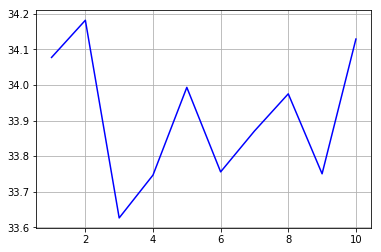

In [9]:
x_draw = range(1,11)
y_draw = []
for i in x_draw:
    train_X, test_X, train_Y, test_Y = train_test_split(all_select_column, all_regressor_result_column, test_size=0.2)
    clr.fit(train_X, train_Y)
    print clr.feature_importances_
    regressor_result = clr.predict(test_X)
    clr.score(test_X, test_Y)
    x = [p[0] for p in regressor_result.tolist()]
    y = [p[1] for p in regressor_result.tolist()]
    test_Y.insert(2, "Pre_lon", x)
    test_Y.insert(3, "Pre_lat", y)
    res = test_Y.apply(haversine, axis=1)
    y_draw.append(res.mean())
plt.plot(x_draw, y_draw, 'b')
plt.grid()
plt.savefig("result.png")

画图要求不明

数据要混合 因为结果不混合

In [10]:
clf = RandomForestClassifier(max_features = int(sqrt(features)))
scores = cross_val_score(clf, all_select_column, all_result_column)
scores.mean()

c:\python27\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.31488594486473609

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(all_select_column, all_result_column, test_size=0.2)

In [12]:
clf.fit(train_X, train_Y)
clf.score(test_X, test_Y)

0.66288978079654215

In [13]:
# start = 10
# end = 10
# rang = 10
# x = range(start,end, rang)
# y = []
# for num in x:
#     clf = RandomForestClassifier(n_estimators=num)
#     scores = cross_val_score(clf, train_select_column, train_result_column)
#     y.append(scores.mean())
# plt.plot(x, y, 'b')
# plt.grid()

In [14]:
clf = clf.fit(train_select_column, train_result_column)